In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gc
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv

In [5]:
# load the new file
df = read_csv('./data/bitcoin_data.csv', date_parser = True)
df.drop(df.columns[0], axis=1,inplace = True)
len(df)

19468

In [6]:
df = df[df['NewDateTime']>= '2021-01-01'].copy()
len(df)

8206

In [7]:
# df.drop(df.head(len(df)%168).index,inplace=True)
# len(df)

In [8]:
int(len(df)/8*7)

7180

In [9]:
data_training = df.iloc[0:int(len(df)/8*7),:]
data_test = df.iloc[int(len(df)/8*7):int(len(df)),:]

len(data_training)

7180

In [10]:
training_data = data_training.drop(['NewDateTime'], axis = 1)


training_data

,close,open,high,low,Volume BTC,returns,log_returns,SOPR,fundingRate,googleTrend
11262,28995.13,28923.63,29031.34,28690.17,2311.811445,1.002472,0.002469,1.041846,0.0367,38
11263,29409.99,28995.13,29470.00,28960.35,5403.068471,1.014308,0.014207,1.041846,0.0367,36
11264,29194.65,29410.00,29465.26,29120.03,2384.231560,0.992678,-0.007349,1.041846,0.0367,34
11265,29278.40,29195.25,29367.00,29150.02,1461.345077,1.002869,0.002865,1.041846,0.0367,33
11266,29220.31,29278.41,29395.00,29029.40,2038.046803,0.998016,-0.001986,1.041846,0.0367,32
...,...,...,...,...,...,...,...,...,...,...
18437,59029.03,58564.00,59091.84,58270.00,2793.149050,1.007941,0.007909,0.998682,0.0331,70
18438,59012.57,59031.50,59324.90,58899.70,2007.475280,0.999721,-0.000279,0.998682,0.0331,70
18439,59162.25,59012.57,59449.00,58709.08,2394.305750,1.002536,0.002533,0.998682,0.0331,70
18440,58819.14,59162.25,59360.20,58758.00,2149.769660,0.994201,-0.005816,0.998682,0.0331,70


In [11]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.        , 0.        , 0.        , ..., 0.85604275, 0.37330183,
        0.27058824],
       [0.01095175, 0.00188395, 0.01155321, ..., 0.85604275, 0.37330183,
        0.24705882],
       [0.00526706, 0.01281533, 0.01142837, ..., 0.85604275, 0.37330183,
        0.22352941],
       ...,
       [0.79637177, 0.79281128, 0.80112545, ..., 0.41470725, 0.36266982,
        0.64705882],
       [0.78731412, 0.79675518, 0.79878668, ..., 0.41470725, 0.36266982,
        0.64705882],
       [0.78859894, 0.78771487, 0.7910395 , ..., 0.41470725, 0.35440047,
        0.64705882]])

In [12]:
X_train = []
Y_train = []

In [13]:
training_data.shape

(7180, 10)

In [14]:
for i in range(168, training_data.shape[0]):
    X_train.append(training_data[i-168:i])
    Y_train.append(training_data[i])

In [15]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [16]:
X_train.shape

(7012, 168, 10)

In [17]:
Y_train.shape

(7012, 10)

In [18]:
Y_train[1,0]

0.255703828070759

In [19]:
X_train[2,167,0]

0.255703828070759

In [20]:
# Y_train=Y_train.reshape(Y_train.shape[0],24,1)

In [21]:
# Y_train[1,:,0]

In [22]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout,RepeatVector,TimeDistributed

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 10)))
model.add(Dropout(0.15))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.15))

model.add(LSTM(units = 80, activation = 'relu'))
model.add(Dropout(0.15))

model.add(Dense(units =10))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 168, 50)           12200     
_________________________________________________________________
dropout (Dropout)            (None, 168, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 168, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 168, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 80)                45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense (Dense)                (None, 10)               

In [25]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=64, verbose=1, validation_split=0.1)

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('168_1.h5')

In [1]:
model.save("168_1.h5")

NameError: name 'model' is not defined

In [34]:
# result = model.predict(X_train, batch_size=128, verbose=0)
# for value in result[0,:,0]:
# 	print('%.1f' % value)

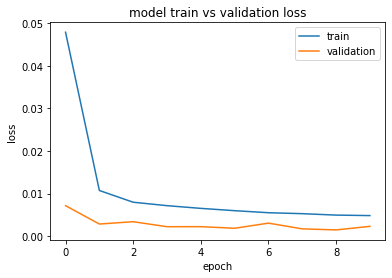

In [50]:
loss = history.history['loss']
epoch = range(len(loss))
# plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [51]:
history.history

{'loss': [0.04788814728604349,
  0.010726330612185404,
  0.007969511516404038,
  0.007164430677619203,
  0.006527131463204719,
  0.005985387603910241,
  0.005506638710559737,
  0.005281831258863636,
  0.004946912739945431,
  0.004834154767623369],
 'val_loss': [0.007165024807926087,
  0.002848245763349907,
  0.00339661476645417,
  0.002219690380092615,
  0.0022356357011530134,
  0.0018552244634916766,
  0.003060048812220239,
  0.0017186870753361798,
  0.0014677861585358737,
  0.002302867572680328]}

In [52]:
# from tensorflow import keras
# regressor = Sequential()
# regressor = keras.models.load_model("LSTM_model_1210.h5")

In [53]:
past_weeks = data_training.tail(168)
df= past_weeks.append(data_test, ignore_index = True)
# test.drop(test.tail(len(test)%168).index,inplace=True)
# test = test.drop(['NewDateTime'], axis=1)
df

,close,open,high,low,Volume BTC,NewDateTime,returns,log_returns,SOPR,fundingRate,googleTrend
0,66363.02,66449.01,66538.61,66104.32,2434.60668,2021-10-20 17:00:00,0.998706,-0.001295,1.009247,0.01,100
1,66644.01,66363.02,66700.00,66323.27,1671.16055,2021-10-20 18:00:00,1.004234,0.004225,1.009247,0.01,100
2,66397.59,66644.00,66700.00,66238.00,1722.61368,2021-10-20 19:00:00,0.996302,-0.003704,1.009247,0.01,100
3,66002.03,66397.60,66444.47,65662.95,2444.83825,2021-10-20 20:00:00,0.994043,-0.005975,1.009247,0.01,100
4,65807.50,65993.78,66064.90,65567.00,1289.63837,2021-10-20 21:00:00,0.997053,-0.002952,1.009247,0.01,100
...,...,...,...,...,...,...,...,...,...,...,...
1189,49620.68,49767.77,49874.47,49477.00,1150.77841,2021-12-09 06:00:00,0.997044,-0.002960,0.996332,0.01,23
1190,50016.89,49620.69,50350.00,49184.49,1981.99757,2021-12-09 07:00:00,1.007985,0.007953,0.996332,0.01,25
1191,49511.54,50016.86,50016.89,49215.74,1339.34458,2021-12-09 08:00:00,0.989896,-0.010155,0.996332,0.01,29
1192,49206.95,49511.54,49540.01,48898.00,2016.55157,2021-12-09 09:00:00,0.993848,-0.006171,0.996332,0.01,39


In [54]:
past_weeks

,close,open,high,low,Volume BTC,NewDateTime,returns,log_returns,SOPR,fundingRate,googleTrend
18274,66363.02,66449.01,66538.61,66104.32,2434.60668,2021-10-20 17:00:00,0.998706,-0.001295,1.009247,0.0100,100
18275,66644.01,66363.02,66700.00,66323.27,1671.16055,2021-10-20 18:00:00,1.004234,0.004225,1.009247,0.0100,100
18276,66397.59,66644.00,66700.00,66238.00,1722.61368,2021-10-20 19:00:00,0.996302,-0.003704,1.009247,0.0100,100
18277,66002.03,66397.60,66444.47,65662.95,2444.83825,2021-10-20 20:00:00,0.994043,-0.005975,1.009247,0.0100,100
18278,65807.50,65993.78,66064.90,65567.00,1289.63837,2021-10-20 21:00:00,0.997053,-0.002952,1.009247,0.0100,100
...,...,...,...,...,...,...,...,...,...,...,...
18437,59029.03,58564.00,59091.84,58270.00,2793.14905,2021-10-27 12:00:00,1.007941,0.007909,0.998682,0.0331,70
18438,59012.57,59031.50,59324.90,58899.70,2007.47528,2021-10-27 13:00:00,0.999721,-0.000279,0.998682,0.0331,70
18439,59162.25,59012.57,59449.00,58709.08,2394.30575,2021-10-27 14:00:00,1.002536,0.002533,0.998682,0.0331,70
18440,58819.14,59162.25,59360.20,58758.00,2149.76966,2021-10-27 15:00:00,0.994201,-0.005816,0.998682,0.0331,70


In [55]:
df = df.drop(['NewDateTime'], axis = 1)
len(df)

1194

In [56]:
yscaler = MinMaxScaler()
inputs = yscaler.fit_transform(df)
inputs

array([[0.897459  , 0.90128406, 0.88607661, ..., 0.58190393, 0.09090909,
        1.        ],
       [0.9101482 , 0.89740109, 0.89354641, ..., 0.58190393, 0.09090909,
        1.        ],
       [0.89902014, 0.91008902, 0.89354641, ..., 0.58190393, 0.09090909,
        1.        ],
       ...,
       [0.13646438, 0.15927418, 0.12138255, ..., 0.194165  , 0.09090909,
        0.14457831],
       [0.12270943, 0.13645596, 0.09931055, ..., 0.194165  , 0.09090909,
        0.26506024],
       [0.12745563, 0.1227019 , 0.09323668, ..., 0.194165  , 0.09090909,
        0.26506024]])

In [57]:
X_test = []
Y_test = []
for i in range(168, inputs.shape[0]):
    X_test.append(inputs[i-168:i])
    Y_test.append(inputs[i])

In [58]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((1026, 168, 10), (1026, 10))

In [59]:
scaler.scale_

array([2.63986674e-05, 2.63489267e-05, 2.63375110e-05, 2.61711525e-05,
       2.26040745e-05, 4.70137657e+00, 4.76290973e+00, 1.02247277e+01,
       2.95333727e+00, 1.17647059e-02])

In [61]:
scale = 1/2.63986674e-05
scale

22144.019975960982

In [62]:
data = (X_test[0,:,:]).reshape(1,168,10)
predata = model.predict(data)
# data = data[0,1:168,:].reshape(1,167,10)
# data = np.append(data, predata)
# data = data.reshape(1,168,10)
# data.shape
# predata = predata.reshape(1,1,10)
predata = scaler.inverse_transform(predata)
predata

array([[ 5.0485902e+04,  5.0916602e+04,  5.1146398e+04,  4.9747363e+04,
         6.2818550e+03,  1.0001169e+00, -2.2523240e-04,  9.9053687e-01,
         3.3675183e-02,  5.4319458e+01]], dtype=float32)

In [63]:
5.7787652e+04*scale

1279650920.2518816

In [64]:
pred = []
real = []
data = (X_test[0,:,:]).reshape(1,168,10)
for i in range(0,168):
    predata = model.predict(data).reshape(1,1,10)
    data = data[0,1:168,:].reshape(1,167,10)
    data = np.append(data, predata)
    data = data.reshape(1,168,10)
    pred.append((predata[0,:,0])*scale)
    real.append((Y_test[i,0])*scale)


type(pred) , real[0]

(list, 12396.499986542658)

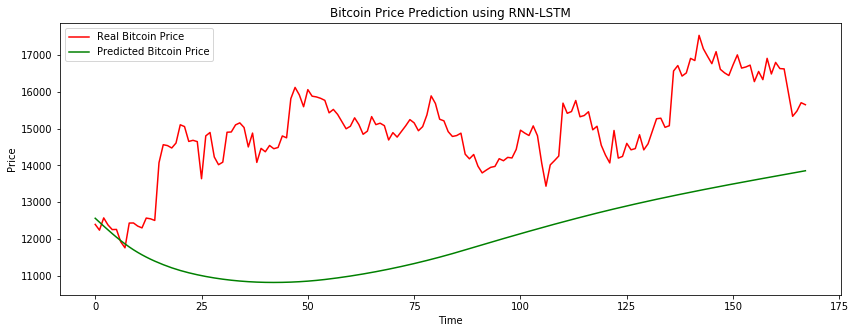

In [65]:
plt.figure(figsize=(14,5))
plt.plot(np.array(real).flat, color = 'red', label = 'Real Bitcoin Price')
plt.plot(np.array(pred).flat, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()